In [1]:
import stylo
stylo.__version__

'0.4.2'

# pip install stylo

PyConUK 2018


[@alcarneyme](https://twitter.com/alcarneyme)

https://github.com/alcarney/stylo

In [2]:
from math import pi
import numpy as np

from matplotlib.pyplot import figure
figure(figsize=(8,8))

from stylo.domain import SquareDomain
from stylo.domain.helpers import CartesianConversion, PolarConversion
from stylo.domain.transform import RealDomainTransform, translate, rotate
from stylo.shape import Circle, Square, Shape
from stylo.color import FillColor, RGB8
from stylo.image import SimpleImage

circle = Circle(0, 0, 0.75)
circle_2 = Circle(0.25, 0.25, 0.75)
square = Square(0, 0, 1.25)

red = FillColor(RGB8.parse("ff0000"))
yellow = FillColor(RGB8.parse("ffff00"))
green = FillColor(RGB8.parse("0000ff"))
black = FillColor()

N = 12

%matplotlib inline

In [3]:
domain = SquareDomain(-1, 1)
domain

SquareDomain: [-1, 1] x [-1, 1]

\\[
   \sqrt{x^2 + y^2} <= r^2
\\]

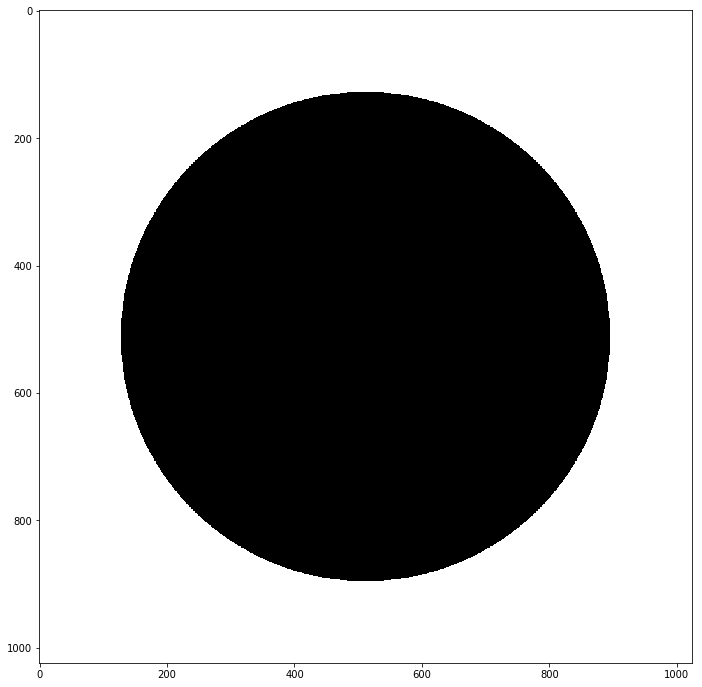

In [4]:
img = SimpleImage(domain, circle, black)
img(1024, 1024, size=(N, N));

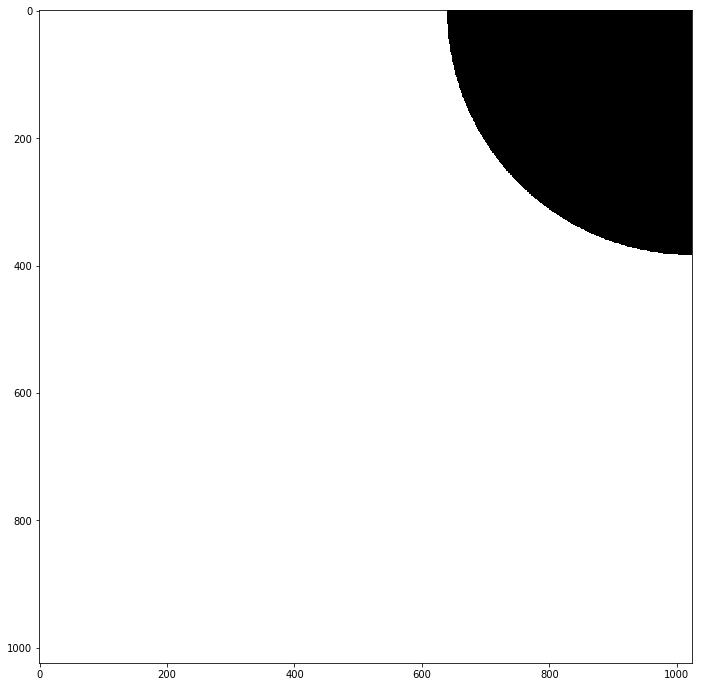

In [5]:
translated = translate(domain, 1, 1)
SimpleImage(translated, circle, black)(1024, 1024, size=(N,N));

In [6]:
class RMapper(CartesianConversion, RealDomainTransform):
    
    def __init__(self, domain, f):
        super().__init__(domain)
        self.f = f
        
    def _repr(self):
        return "RMapper"
        
    def _get_r(self):
        
        xs = self.domain.x
        ys = self.domain.y
        
        def mk_rs(width, height):
            x = xs(width, height)
            y = ys(width, height)
            
            return self.f(x, y)
            
        return mk_rs
    
    def _get_t(self):
        return self.domain.t
    
def dice(x, y):
    return np.sin(pi*x) * np.sin(pi*y)

def two(x, y):
    return x* np.tan(pi*y) / y

dice_domain = RMapper(domain, dice)
twod = RMapper(domain, two)

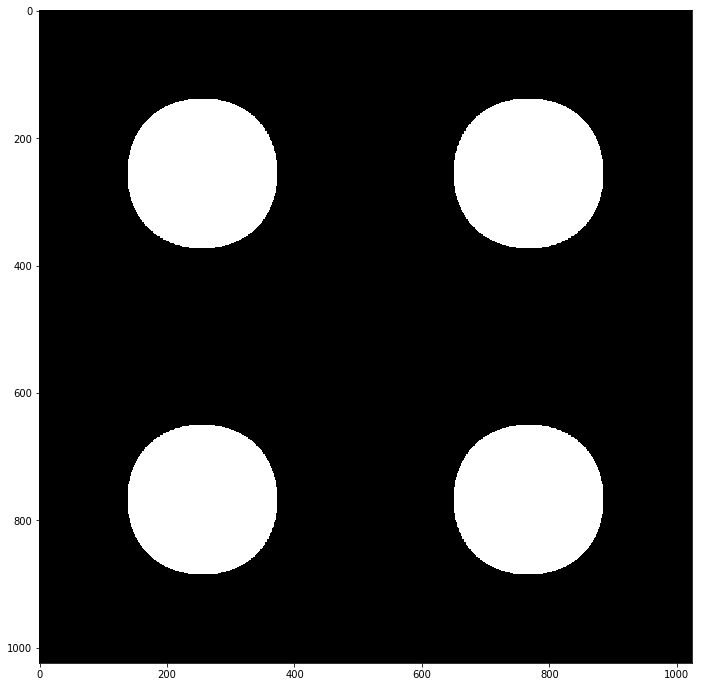

In [7]:
SimpleImage(dice_domain, circle, black)(1024, 1024, size=(N,N));

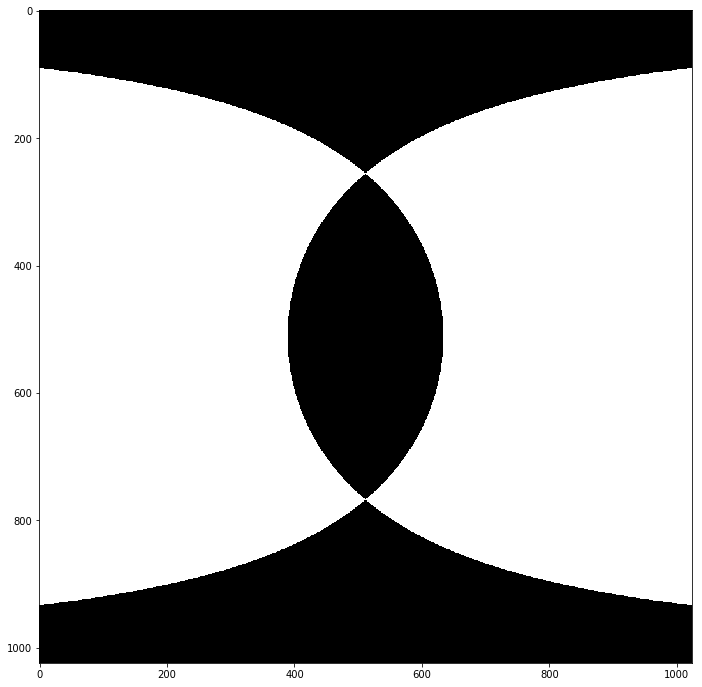

In [8]:
SimpleImage(twod, circle, black)(1024, 1024, size=(N,N));

In [9]:
class TMapper(CartesianConversion, RealDomainTransform):
    
    def __init__(self, domain, f):
        super().__init__(domain)
        self.f = f
        
    def _repr(self):
        return "TMapper"
    
    def _get_r(self):
        return self.domain.r
    
    def _get_t(self):
        
        xs = self.domain.x
        ys = self.domain.y
        
        def mk_ts(width, height):
            x = xs(width, height)
            y = ys(width, height)
            
            return self.f(x, y)
            
        return mk_ts
    
def one(x, y):
    return np.cos(pi*x)/np.sin(pi*y)

def two(x, y):
    return np.tan(y/x)

def three(x, y):
    return x*x*np.sin(pi/y)

oned = TMapper(domain, one)
twod = TMapper(domain, two)
threed = TMapper(domain, three)

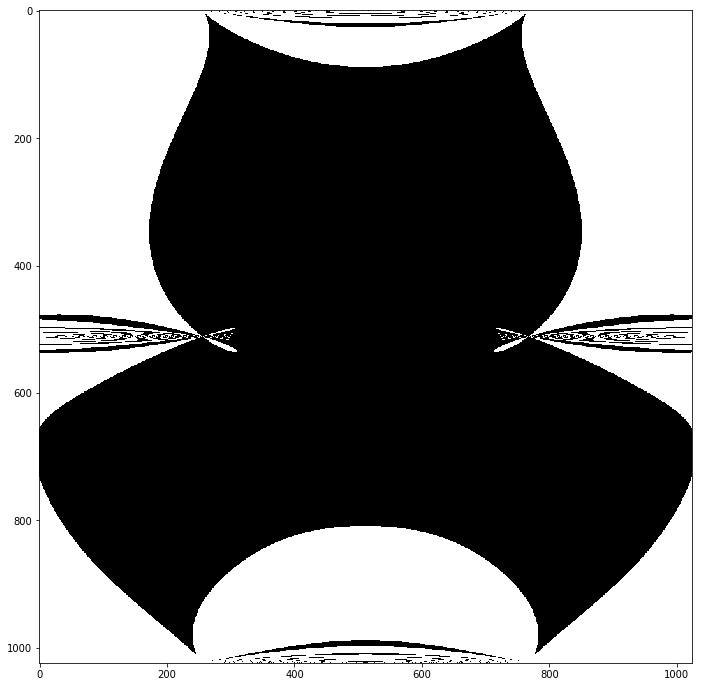

In [10]:
SimpleImage(oned, circle_2, black)(1024, 1024, size=(N,N));

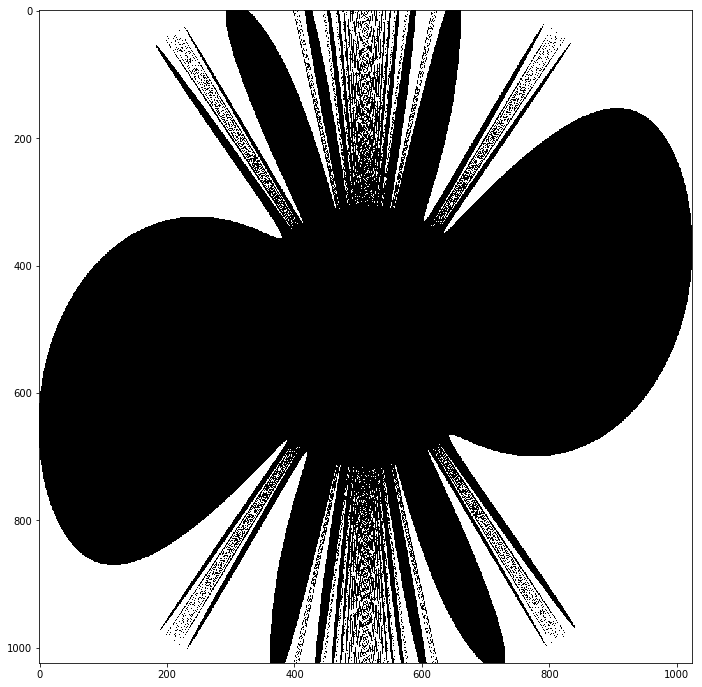

In [11]:
SimpleImage(twod, circle_2, black)(1024, 1024, size=(N,N));

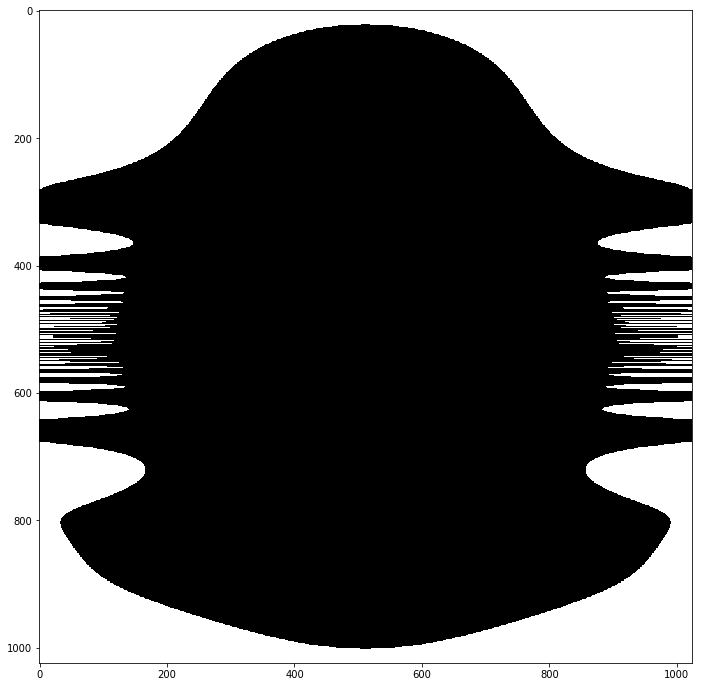

In [12]:
SimpleImage(threed, circle_2, black)(1024, 1024, size=(N,N));

In [13]:
class Pacman(Shape):
    
    def draw(self):
        
        def pacman(x, y, t):
            cs = circle(x=x, y=y)
            ts = np.logical_not(np.abs(t) < 0.6)
            
            return np.logical_and(cs, ts)
        
        return pacman
        
pacman = Pacman()

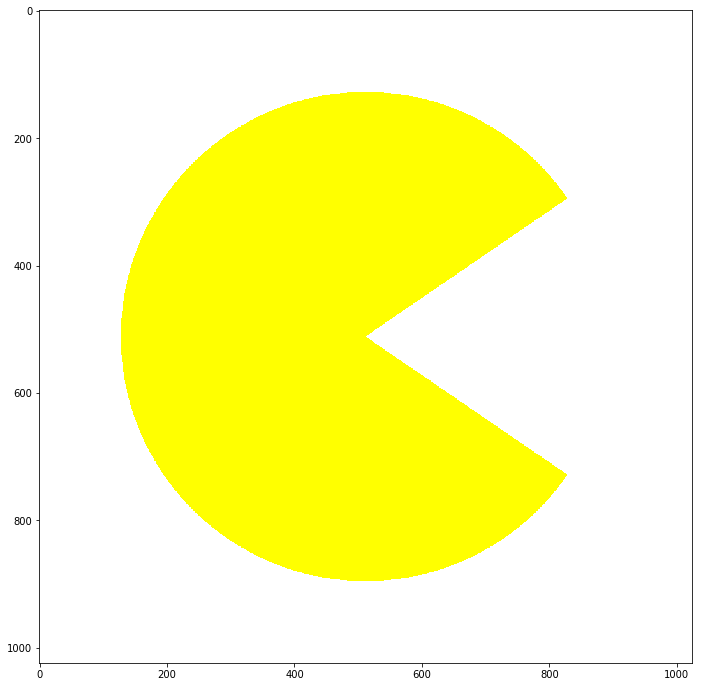

In [14]:
SimpleImage(domain, pacman, yellow)(1024, 1024, size=(N,N));

![warning](warning.jpg)